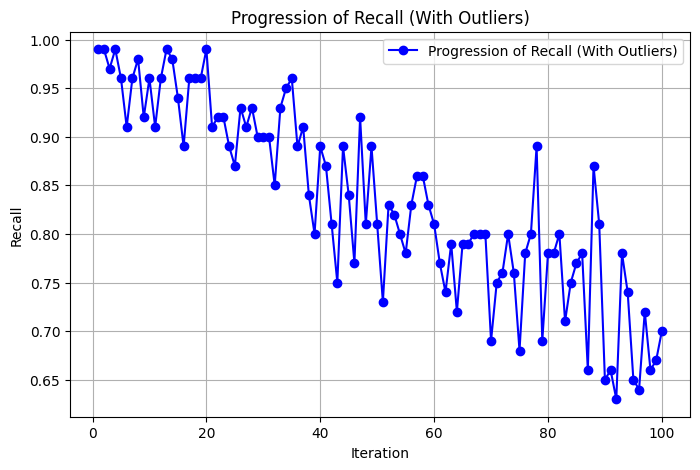

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

def load_data_from_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

def plot_metric(x_values, y_values, ylabel, title, show_outliers=True):
    plt.figure(figsize=(8, 5))
    label = "With Outliers" if show_outliers else "Without Outliers"
    color = "blue" if show_outliers else "red"

    plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=f"{title} ({label})")
    plt.xlabel("Iteration")
    plt.ylabel(ylabel)
    plt.title(f"{title} ({label})")
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_recall_and_query_time_variation(file_path):
    data = load_data_from_json(file_path)
    
    iterations = [entry["iteration"] for entry in data]
    recalls = [entry["recall"] for entry in data]


    plot_metric(iterations, recalls, "Recall", "Progression of Recall", show_outliers=True)

 
 

plot_recall_and_query_time_variation("recall_results_20250228_143638.json")